# The Gradient Descent Algorithm

In this task, gradient descent is implemented from scratch to predict whether a given tumor is benign or malignant based on its characteristics (represented by the various features in the dataset). This is a binary classification problem, where the two classes are represented by the labels 0 and 1.

The breast cancer dataset from Scikit-learn is used. The labels 0 and 1 represent the two classes into which the tumors have been classified. Specifically:
- Maligent = 0 - tumors that are problematic.
- Benign = 1 - tumors that are not usually problematic.

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Dataset
The data set is imported from Scikit-learn. A detailed description and visualization of the cancer dataset is provided in the [Perceptron Notebook](https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/blob/main/Supervised_Learning/1_Perceptron/Perceptron.ipynb).

In [2]:
# Load breast cancer dataset
data = load_breast_cancer()

#### Data splitting and normalization
Before model building, the data is separated into features and lables and then into testing and training sets. The data is manually normalized here instead of using StandardScalar from Scikit-learn. 

In [3]:
#Split labels and features
X = data.data
y = data.target
# Normalize the features 
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
# Add a column of ones to represent the bias term
X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

#### Model Building

In [4]:
# Define the cost function
def loss(X, y, w):
    """
    Calculate the mean squared error (loss)

    Parameters
    ----------
    X : numpy array, shape (m, n)
        Matrix of input features, where m is the number of examples and n is the number of features.
    y : numpy array, shape (m,)
        Vector of output labels.
    w : numpy array, shape (n,)
        Vector of model parameters.

    Returns
    -------
    J : float
        The mean squared error loss between the predicted output and the true output.
    """ 
    m = len(y)
    h = X @ w
    J = (1/(2*m)) * np.sum((h - y)**2)
    return J


# Define the gradient descent function
def gradient_descent(X, y, w, learning_rate, epochs):
    """
    Perform gradient descent to learn the parameters of model.

    Parameters
    ----------
    X : numpy array, shape (m, n)
        Matrix of input features, where m is the number of examples and n is the number of features.
    y : numpy array, shape (m,)
        Vector of output labels.
    w : numpy array, shape (n,)
        Vector of initial model parameters.
    learning_rate : float
        The step size used to update the model parameters.
    epochs : int
        The number of iterations to perform gradient descent.

    Returns
    -------
    w : numpy array, shape (n,)
        The learned model parameters.
    loss_history : numpy array, shape (epochs,)
        The history of the loss values during gradient descent
    """
    m = len(y)
    loss_history = np.zeros(epochs)
    for i in range(epochs):
        h = X @ w
        w = w - (learning_rate/m) * (X.T @ (h - y))
        loss_history[i] = loss(X, y, w)
    return w, loss_history

def predict(X, w):
    """
    Make predictions using the learned weights
    
    X : numpy array, shape (m, n)
        Matrix of input features, where m is the number of examples and n is the number of features.
    w : numpy array, shape (n,)
        Vector of initial model parameters.
    
    Returns
    -------
    z : numpy array, shape (n,)
        The predicted label.

    """
    z = abs(np.round(np.dot(X, w)))
    return z


#### Taining the model
The model is trained on the training data. 

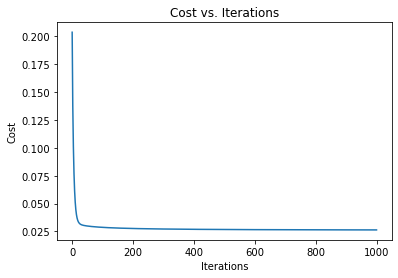

In [5]:
# Initialize the parameters and hyperparameters
w = np.zeros(X_norm.shape[1])
learning_rate = 0.1
epochs = 1000

# Run gradient descent on the training set
w, loss_history = gradient_descent(X_train, y_train, w, learning_rate, epochs)

# Plot the cost function over iterations
plt.plot(range(epochs), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

#### Model Evaluation
The performance of the model is evaluated using testing data and multiple metrics such as accuracy.

In [6]:
# Evaluate the model on the test set
y_pred = predict(X_test, w)
accuracy = accuracy_score(y_test, y_pred)
print('Testing Accuracy: {:.2f}%'.format(accuracy*100))

Testing Accuracy: 95.61%


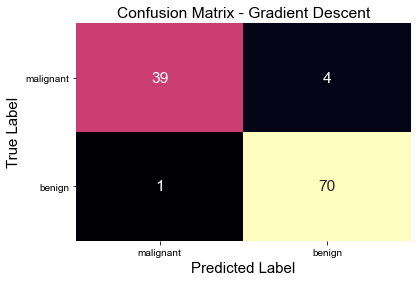

In [7]:
# Import metrics from sklearn 
from sklearn import metrics

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)
ax.set_title("Confusion Matrix - Gradient Descent")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["malignant", "benign"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["malignant", "benign"], rotation=0)
plt.show()

In [8]:
from sklearn.metrics import classification_report
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Conclusion
The model evaluation shows that gradient descent is capable of predicting the type of tumor with a very high accuracy. A summary of the results obtained is:
1. The gradient descent is able to achieve a testing accuracy of 96%.
2. The precision of the gradient descent is 97% and 95% respectively for malignant and benign tumors.